In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from ultralytics import  YOLO
detection_model = YOLO(r'C:\Users\ASUS\Desktop\image processing project\output_v3\best_after_25epochs_medium.pt')

In [10]:
img =cv.imread('test_168.jpg',cv.IMREAD_COLOR)
img.shape

(3264, 2448, 3)

In [11]:
# detect object using  model
results =detection_model(img)

# bounding boxes
bboxes = results[0].boxes

normalized_bboxes = []

for box in bboxes:
    normalized_bboxes.append(np.array(box.xywhn)[0])

# write this to text file
with open('bboxes_test_168.txt', 'w') as f:
    for item in normalized_bboxes:
        f.write("%s\n" % item)


0: 640x480 176 objects, 426.6ms
Speed: 3.0ms preprocess, 426.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


In [12]:
import cv2
def plot_image_with_boxes(image_path, text_file_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    f = open(text_file_path, "r")
    for line in f:
        line = line.split()
        x_center = float(line[1])
        y_center = float(line[2])
        width = float(line[3])
        height = float(line[4])
        x1 = int((x_center - width / 2) * img.shape[1])
        y1 = int((y_center - height / 2) * img.shape[0])
        x2 = int((x_center + width / 2) * img.shape[1])
        y2 = int((y_center + height / 2) * img.shape[0])
        #print(x1,y1,x2,y2)
        img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()
    cv.imwrite('test_168_original.jpg',img)

[array([    0.74489,      0.2465,    0.060419,      0.1725], dtype=float32), array([     0.6813,     0.24684,    0.060473,     0.16241], dtype=float32), array([    0.81349,      0.2449,    0.068202,     0.18204], dtype=float32)]


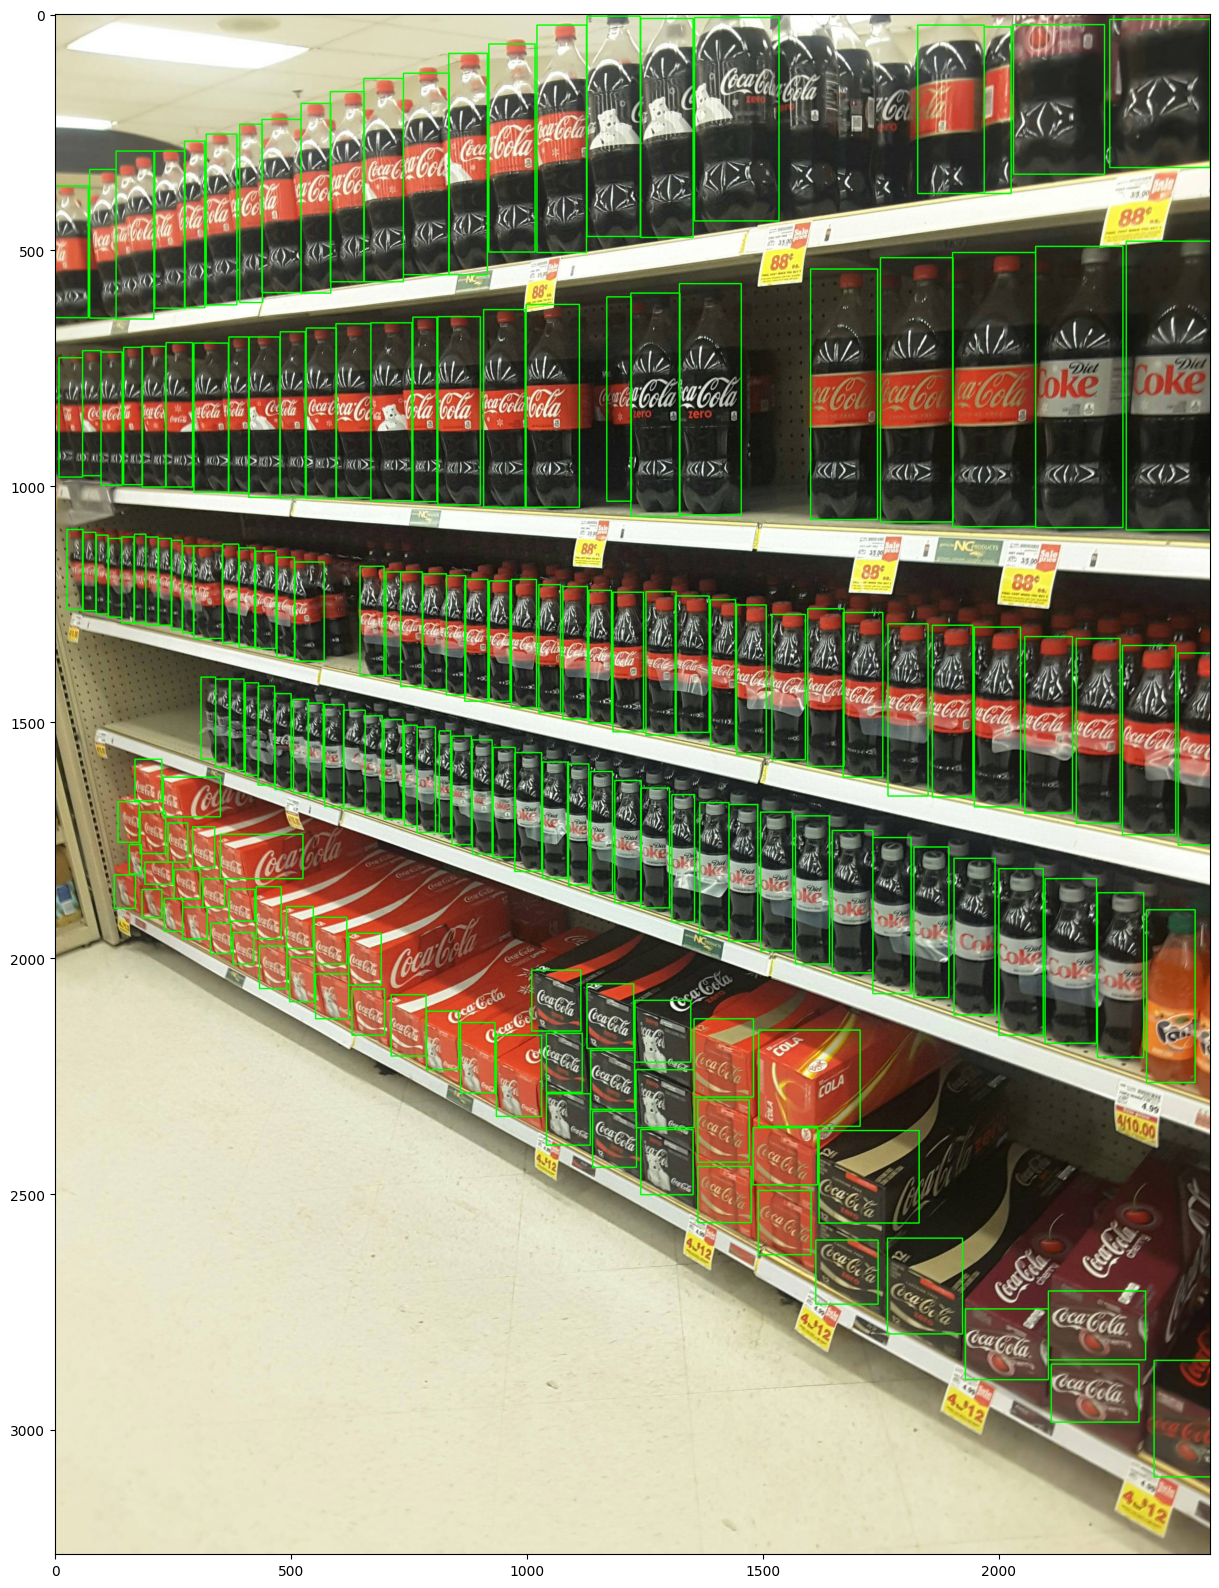

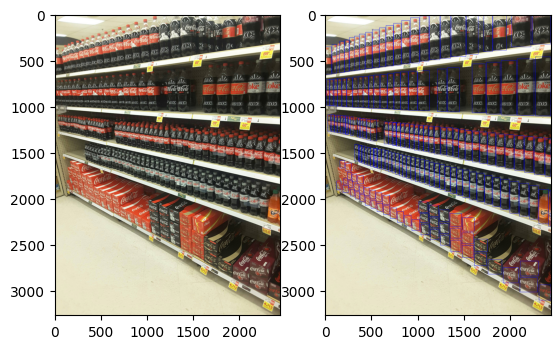

True

In [13]:
img1 =cv.imread('test_168.jpg',cv.IMREAD_COLOR)

original_imag1 = img1.copy()

# cv.imshow('image',img1) 
# cv.waitKey(0)
# cv.destroyAllWindows()

box_data = []
#read data from txt file
with open('bboxes_test_168.txt') as f:
    for i in f.readlines():
        data = i.split()[1:]
        data[-1] = data[-1][:-1]
        box_data.append(np.array(data,dtype=np.float32))

print(box_data[:3])

#`x_center`, `y_center`, `width`, `height`

height,width = img1.shape[:2]

for i in range(len(box_data)):
    x_center = int(box_data[i][0]*width)
    y_center = int(box_data[i][1]*height)
    w = int(box_data[i][2]*width)
    h = int(box_data[i][3]*height)
    x1 = int(x_center - w/2)
    y1 = int(y_center - h/2)
    x2 = int(x_center + w/2)
    y2 = int(y_center + h/2)
    cv.rectangle(img1,(x1,y1),(x2,y2),(255,0,0),2)

#------------------------------------------------------------------------------------------
test0_path_labels = r"C:\Users\ASUS\Desktop\image processing project\test\test_168.txt"
test0_path_image = r"C:\Users\ASUS\Desktop\image processing project\test\test_168.jpg"

plot_image_with_boxes(test0_path_image, test0_path_labels)

#-----------------------------------------------------------------------------------------
# convert images
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
original_imag1 = cv.cvtColor(original_imag1,cv.COLOR_BGR2RGB)

# plot twom images
plt.subplot(1,2,1)
plt.imshow(original_imag1)
plt.subplot(1,2,2)
plt.imshow(img1)
plt.show()

cv.imwrite('test_168_result.jpg',img1)



$Prediction \quad in \quad video$

In [7]:
import os
from ultralytics import YOLO
import cv2

VIDEOS_DIR = r'C:\Users\ASUS\Desktop\image processing project\test'

video_path = os.path.join(VIDEOS_DIR, 'densely_packed_packets.mp4')
video_path_out = '{}_output.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = r'C:\Users\ASUS\Desktop\image processing project\output_v3\best_after_25epochs_medium.pt'

# Load a model
model = YOLO(model_path)  # load a custom model

# decision threshold
threshold = 0.5

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            # cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
            #             cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 60 objects, 339.3ms
Speed: 4.0ms preprocess, 339.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 59 objects, 324.3ms
Speed: 3.6ms preprocess, 324.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 59 objects, 323.9ms
Speed: 2.0ms preprocess, 323.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 59 objects, 400.3ms
Speed: 1.0ms preprocess, 400.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 59 objects, 330.9ms
Speed: 1.0ms preprocess, 330.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 59 objects, 341.6ms
Speed: 2.3ms preprocess, 341.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 61 objects, 335.2ms
Speed: 2.0ms preprocess, 335.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 59 objects, 326.0ms
Speed: 2.0ms preprocess, 326.0ms inference, 0.0ms postproc